# 数据规整（复杂）

*  上周主要内容：数据规整（复杂）
*  本周主要内容：分进合击（二维复杂）

-----
我们不仅知道数据规整手段重要，数据样态(及其目的)更重要，也迫不及得策划项目了。

让我们来挑战分进合击（二维复杂），以有意义的方式来整合不同数据

-----

##  介绍

### 上3周主要内容：
1. 分进合击（一维复杂）
2. 数据规整（复杂）--区分 报表 vs. 数据库 的数据样态
3. 数据项目策划


### 本周主要内容：分进合击（二维复杂）
![宽至长使用melt](https://pandas.pydata.org/pandas-docs/stable/_images/07_melt1.svg#thumbnail)
1. <mark>数据样态的重要性</mark>：
  * 原分析单元：独角兽
  * 目标分析单元：湾区丶行业
  * 中介变量：国家丶城市
  * 整合数据源：
    * 新增湾区
    * 结合（中国）国家数据库的行业？
2. 进行数据规整：
  * <mark>机器化（代码取用方便，较长）</mark> records, stacked (右图上)
  * <mark>报表化（人类视解理解方便，较寛）</mark> (右图下)
![长至宽使用pivot](https://pandas.pydata.org/pandas-docs/stable/_images/07_pivot.svg#thumbnail)


### 本电子讲义说明

本电子讲义为一系列课程的主要教材
* 课程：
  * 20春_数据分析pandas （中山大学南方学院）
* 电子讲义设计者：廖汉腾, 许智超
* 参考来源: [官方英文新手教程](https://pandas.pydata.org/pandas-docs/version/1.0.2/getting_started/index.html#getting-started)
* 数据来源：[分省国家数据](http://data.stats.gov.cn/easyquery.htm?cn=E0103)

-----


课堂教学方式：
* 分段式以英文新手教程的内容做示范及说明
* 课堂上以实际中文数据做操练，每段约10-15分钟
* 抽学生联mic自播说明难点及成果点，教师总结

-----

课后实践方式：
* 学生fork教师提供的代码，做以下实践
* (必做)一项为此代码的实践，学生需要对ipynb文档中的说明(含markdown及图片)及代码进行演化改进，可以是注解说明，可以是调整参数实验，可以是额外方法实践，可以是以上的组合，学生
* (选做)一项为此代码的延伸实践，学生对ipynb文档中的一部分或全部进行演化，变成另一个独立项目，说好或做好一件事


In [350]:
%%html
<style>
/* 本电子讲义使用之CSS */
div.code_cell {
    background-color: #e5f1fe;
}
div.cell.selected {
    background-color: #effee2;
    font-size: 2rem;
    line-height: 2.4rem;
}
div.cell.selected .rendered_html table {
    font-size: 2rem !important;
    line-height: 2.4rem !important;
}
.rendered_html pre code {
    background-color: #C4E4ff;   
    padding: 2px 25px;
}
.rendered_html pre {
    background-color: #99c9ff;
}
div.code_cell .CodeMirror {
    font-size: 2rem !important;
    line-height: 3.6rem !important;
}
.rendered_html img, .rendered_html svg {
    max-width: 60%;
    height: auto;
    float: right;
}

.rendered_html img[src*="#full"], .rendered_html svg[src*="#full"] {
    max-width: 100%;
    height: auto;
    float: none;
}

.rendered_html img[src*="#thumbnail"], .rendered_html svg[src*="#thumbnail"] {
    max-width: 35%;
    height: auto;
}
.rendered_html img[src*="#thumbnailauto"], .rendered_html svg[src*="#thumbnail"] {
    max-width: auto;
    height: auto;
}

/* Gradient transparent - color - transparent */
hr {
    border: 0;
    border-bottom: 1px dashed #ccc;
}
.emoticon{
    font-size: 5rem;
    line-height: 4.4rem;
    text-align: center;
    vertical-align: middle;
}
.bg-reshape {
    width: 550px;
    height: 205px;
    background: url('../20春_pandas_CheatSheet.svg') -205px -110px;
}
.break {
                   page-break-after: right; 
                   width:100%;
                   clear:both;
}
</style>

In [3]:
import pandas as pd
import json

## 本周内容纲要

* 独角兽
  * 部分投资机构丶创始人的网路分析
  * 新增湾区
* （中国）国家数据库 
* 独角兽 + （中国）国家数据库 

# 区分 报表 vs. 数据库 的数据样态
## A 独角兽
### A-0 数据准备 
数据库的数据样态

In [363]:
# A-0-0 简化栏位变数名称
df = pd.read_csv ("20春_pandas_week02_hurun_unicorn.tsv", encoding = "utf8", sep="\t")
df.columns = [x.replace('（亿人民币）','').replace('掌门人/','')\
               .replace('Company Name','独角兽_英')\
               .replace('企业名称','独角兽')\
               .replace('成立年份','成立年')\
               .replace('部分投资机构','投资机构')\
                for x in df.columns]
独角兽=df.copy()
独角兽.columns.name = "独角兽"
独角兽.head()

独角兽,排名,独角兽,独角兽_英,估值,国家,城市,行业,创始人,成立年,投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."


In [364]:
# A-0-1 输出报表 独角兽_城市分布
独角兽_城市分布 = 独角兽.groupby(["国家","城市"]).agg({"独角兽":"count"})\
                 .rename(columns = {"独角兽":"count"})\
                 .sort_values(by="count", ascending=False).reset_index()
独角兽_城市分布.columns.name = "独角兽_城市分布"
独角兽_城市分布

独角兽_城市分布,国家,城市,count
0,中国,北京,81
1,美国,旧金山,55
2,中国,上海,47
3,美国,纽约,25
4,中国,杭州,19
...,...,...,...
116,美国,Emerville,1
117,美国,Burlington Massachussets,1
118,瑞士,洛桑市,1
119,瑞士,楚格,1


In [365]:
with pd.ExcelWriter("20春_pandas_week02_hurun_unicorn.xlsx") as writer:
    workbook  = writer.book
    for _df_ in [独角兽, 独角兽_城市分布]:
        _df_.to_excel(writer, sheet_name = _df_.columns.name, )

### A-1 数据拆分成新表
往数据库的数据样态走，准备网络分析(network anlayis and visualizaiton)

In [375]:
独角兽_创始人 = 独角兽.set_index("独角兽")[['创始人']].copy()
独角兽_创始人['创始人'] = [x.replace("、",",").replace(", ",",").split(",") for x in 独角兽['创始人']]
独角兽_创始人['创始人'].apply(pd.Series)\
            .reset_index()\
            .melt(id_vars='独角兽', value_name='创始人')\
            .drop("variable", axis = 1)\
            .dropna()\
            .reset_index(drop=True)

,独角兽,创始人
0,蚂蚁金服,井贤栋
1,字节跳动,张一鸣
2,滴滴出行,程维
3,Infor,Jim Schaper
4,JUUL Labs,Adam Bowen
...,...,...
910,ironSource,Tomer Bar Zeev
911,Lazada,Oliver Samwer
912,Lazada,Stefan Bruun
913,Lazada,Stein Jakob Oeie


In [376]:
独角兽_投资机构 = 独角兽.set_index("独角兽")[['投资机构']].copy()
独角兽_投资机构['投资机构'] = [x.replace("、",",").replace(", ",",").split(",") for x in 独角兽['投资机构']]
独_投 = 独角兽_投资机构['投资机构'].apply(pd.Series)\
            .reset_index()\
            .melt(id_vars='独角兽', value_name='投资机构')\
            .drop("variable", axis = 1)\
            .dropna()\
            .reset_index(drop=True)
独_投

,独角兽,投资机构
0,蚂蚁金服,春华资本
1,字节跳动,红杉资本
2,滴滴出行,腾讯
3,Infor,Golden Gate Capital
4,JUUL Labs,M13
...,...,...
1830,Ola Cabs,Steadview Capital
1831,Grab,Bookings Holdings
1832,Ola Cabs,Tencent Holdings
1833,Grab,


### A-2 新表可分析不同单元
数据库数据样态的好处

In [390]:
# A-2 各种新表探索
# 独_投.set_index("独角兽").loc['Grab']
独角兽top = 独_投.groupby("独角兽").count().sort_values(by="投资机构", ascending=False)
投资机构top = 独_投.groupby("投资机构").count().sort_values(by="独角兽", ascending=False)
target = 独_投.set_index("投资机构").loc[投资机构top[0:10].index].reset_index()
投l = list(target.投资机构.unique())[0:5]
target = 独_投[独_投.投资机构.isin(投l)]
t = target.groupby("独角兽").count().sort_values(by="投资机构", ascending=False)
企l = list(t[t.投资机构>=2].index)
print (企l)

['找钢网', 'Nubank', 'SheIn', '斗鱼', 'Instacart', '自如', '罗辑思维', 'VIPKID', '空中云汇', '京东物流', '比特大陆', '百融金服', '猿辅导', 'Stripe', '水滴', '满帮', '快手', '滴滴出行', '小红书', '雾芯科技', '企鹅杏仁', '车好多', '微医', '博纳影业']


### A-3 准备网络图
节点数和连结数不宜太多

In [393]:
# A-3 准备网络图 
target = target[target.独角兽.isin(企l)].sort_values(by="投资机构")
target

,独角兽,投资机构
134,猿辅导,IDG
1269,水滴,IDG
1438,百融金服,IDG
513,比特大陆,IDG
968,车好多,IDG
722,SheIn,IDG
262,找钢网,IDG
205,雾芯科技,IDG
524,Instacart,Sequoia Capital
1314,Stripe,Sequoia Capital


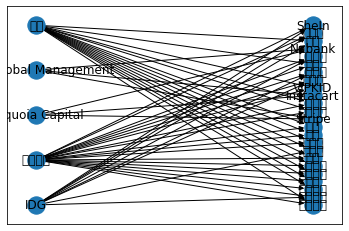

In [396]:
# A-4 网络图
import networkx as nx
G = nx.from_pandas_edgelist(target, '投资机构', '独角兽',  create_using=nx.DiGraph)
#pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k=2.3)
#pos = nx.spectral_layout(G)
#pos = nx.spiral_layout(G)
pos = nx.bipartite_layout(G, nodes=list(target.投资机构.unique()))
nx.draw_networkx(G, pos, arrows=True, with_labels=True)

In [397]:
# A-4 网络图交互式
allnodes = list(target.melt().value.unique())
dict_企投 = target.groupby("独角兽").agg(list).to_dict()['投资机构']
dict_企投 = {k:", ".join(dict_企投[k]) if k in dict_企投.keys() else "本身是投资机构" for k in allnodes}
dict_企投

{'猿辅导': 'IDG, 腾讯',
 '水滴': 'IDG, 腾讯',
 '百融金服': 'IDG, 红杉资本',
 '比特大陆': 'IDG, 红杉资本',
 '车好多': 'IDG, 红杉资本',
 'SheIn': 'IDG, 红杉资本',
 '找钢网': 'IDG, 红杉资本',
 '雾芯科技': 'IDG, 红杉资本',
 'Instacart': 'Sequoia Capital, Tiger Global Management',
 'Stripe': 'Sequoia Capital, Tiger Global Management',
 'Nubank': 'Sequoia Capital, Tiger Global Management',
 '京东物流': '红杉资本, 腾讯',
 '空中云汇': '红杉资本, 腾讯',
 '滴滴出行': '红杉资本, 腾讯',
 '企鹅杏仁': '红杉资本, 腾讯',
 'VIPKID': '红杉资本, 腾讯',
 '自如': '红杉资本, 腾讯',
 '罗辑思维': '红杉资本, 腾讯',
 '小红书': '红杉资本, 腾讯',
 '博纳影业': '红杉资本, 腾讯',
 '微医': '红杉资本, 腾讯',
 '快手': '红杉资本, 腾讯',
 '满帮': '红杉资本, 腾讯',
 '斗鱼': '红杉资本, 腾讯',
 'IDG': '本身是投资机构',
 'Sequoia Capital': '本身是投资机构',
 'Tiger Global Management': '本身是投资机构',
 '红杉资本': '本身是投资机构',
 '腾讯': '本身是投资机构'}

In [398]:
dict_投企 = target.groupby("投资机构").agg(list).to_dict()['独角兽']
node_colors = {k:"red" if k in dict_投企.keys() else "blue" for k in allnodes}
dict_投企 = {k:", ".join(dict_投企[k]) if k in dict_投企.keys() else "本身是独角兽" for k in allnodes}
dict_投企.keys()

dict_keys(['猿辅导', '水滴', '百融金服', '比特大陆', '车好多', 'SheIn', '找钢网', '雾芯科技', 'Instacart', 'Stripe', 'Nubank', '京东物流', '空中云汇', '滴滴出行', '企鹅杏仁', 'VIPKID', '自如', '罗辑思维', '小红书', '博纳影业', '微医', '快手', '满帮', '斗鱼', 'IDG', 'Sequoia Capital', 'Tiger Global Management', '红杉资本', '腾讯'])

In [400]:
nx.set_node_attributes(G, dict_企投, 'VC')
nx.set_node_attributes(G, dict_投企, 'unicorn')
nx.set_node_attributes(G, node_colors, "node_color")
# G.nodes['IDG']
# G.nodes['猿辅导']
N = len(list(G.nodes))
node_indices = list(range(N))

import networkx as nx

from bokeh.io import output_file, show
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

# Show with Bokeh
plot = Plot(plot_width=1000, plot_height=800,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("名", "@index"), ("投资机构", "@VC"), ("投资的独角兽", "@unicorn")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

#graph_renderer = from_networkx(G, nx.fruchterman_reingold_layout, scale=1, center=(0, 0))
graph_renderer = from_networkx(G, pos, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color="node_color")
#graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)